# Benchmarking Environment for Liar's Dice Game
(AA228 Final Project)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.game import LiarsDiceGame
from config import *
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
import torch
ckpt = torch.load("agents/agent_8.pt", map_location="cpu")
print("model_type:", ckpt.get("model_type"))
print("keys:",ckpt.keys())

model_type: dron_moe
keys: dict_keys(['policy_state', 'target_state', 'optimizer_state', 'episode', 'epsilon', 'step_count', 'wins', 'win_rate_history', 'stage_boundaries', 'memory', 'roster', 'model_type'])


## Testing

In [2]:
winner = LiarsDiceGame.game("wildcard_conservative", "random", save_json=True)
print(f"Winner is Player P{winner}")

Game over! Winner: P0. Game history saved to data\game_20251126_184648_55f26f.json
Winner is Player P0


## Settings

In [4]:
N_GAMES = 1000  # Number of games to simulate
latex_figsize = (6, 2)  # Figure size for LaTeX documents
latex_fontsize = 10  # Font size for LaTeX documents
save_path = "figures/benchmark/"  # Directory to save figures
os.makedirs(save_path, exist_ok=True)

# Single Configuration

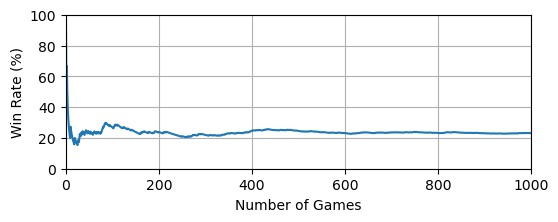

In [168]:
# config
player = "rand"
enemies = ["rand", "rand", "rand"]

# initialize win_rate
win_rate = np.zeros(N_GAMES)

for i in range(N_GAMES):
    winner = LiarsDiceGame.game(player, *enemies, save_json=False, dir=None)
    if i == 0:
        win_rate[i] = 1 if winner == 0 else 0
    else:
        if winner == 0:
            win_rate[i] = (win_rate[i-1] * i + 1) / (i + 1)
        else:
            win_rate[i] = (win_rate[i-1] * i) / (i + 1)

# plot results
plt.figure(figsize=latex_figsize)
plt.plot(win_rate * 100)
plt.xlabel("Number of Games", fontsize=latex_fontsize)
plt.ylabel("Win Rate (%)", fontsize=latex_fontsize)
plt.xlim(0, N_GAMES)
plt.ylim(0, 100)
plt.grid()

# All Configurations

In [9]:
# agents to test for
agents = ["wildcard_conservative", "wildcard_risky", "conservative", "risky"]
# configurations to test against
# versus_configs = [("random", "random", "random"),
#                   ("conservative", "conservative", "conservative"),
#                   ("risky", "risky", "risky"),
#                   ("wildcard_conservative", "wildcard_conservative", "wildcard_conservative"),
#                   ("wildcard_risky", "wildcard_risky", "wildcard_risky")]
# versus_configs = [("random", "wildcard_risky"),
#                   ("wildcard_risky", "wildcard_conservative"),
#                   ("wildcard_conservative", "random"),
#                   ("random", "random"),
#                   ("wildcard_risky", "wildcard_risky"),
#                   ("wildcard_conservative", "wildcard_conservative"),
#                   ("conservative", "conservative"),
#                   ("risky", "risky"),
#                   ("risky", "conservative")]
versus_configs = [("random"),
                  ("wildcard_risky"),
                  ("wildcard_conservative"),
                  ("risky"),
                  ("conservative")]

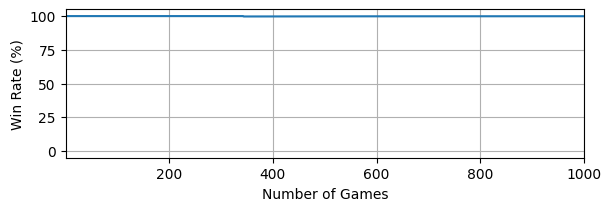

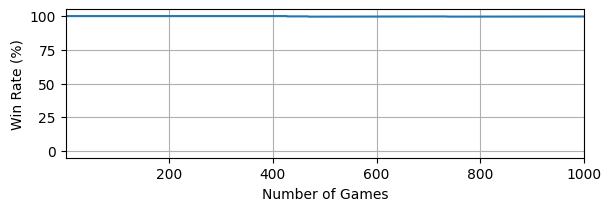

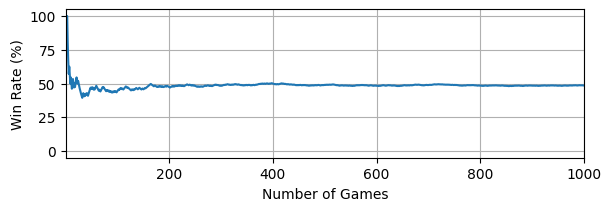

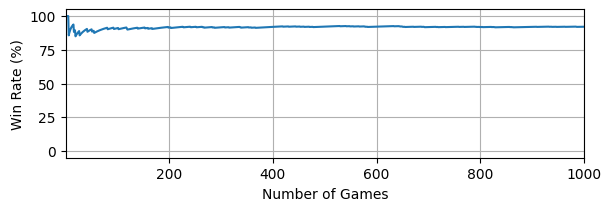

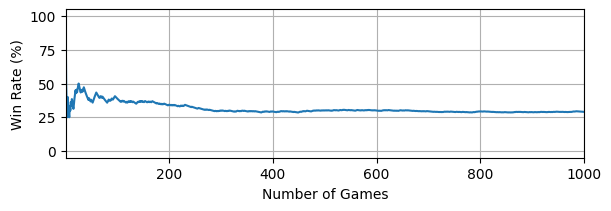

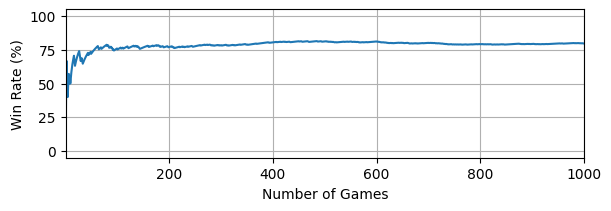

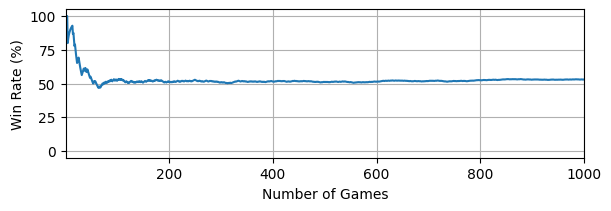

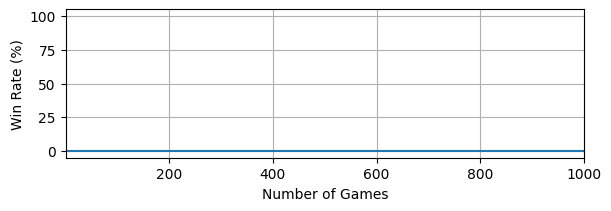

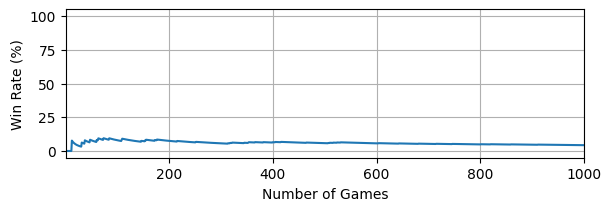

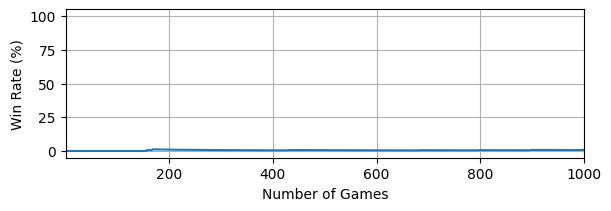

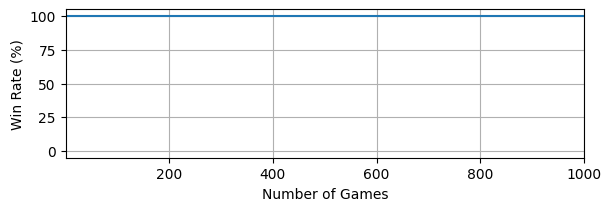

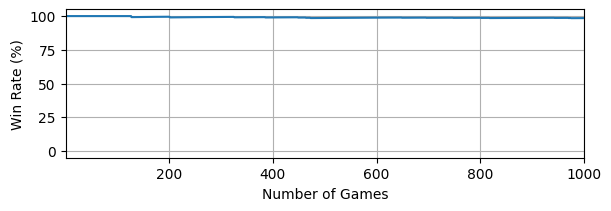

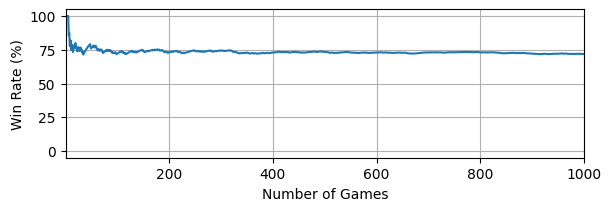

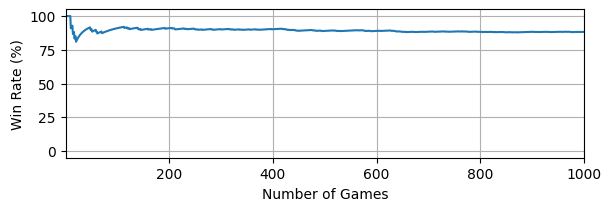

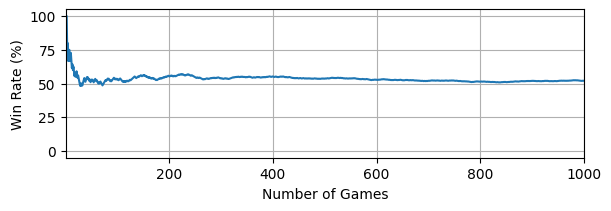

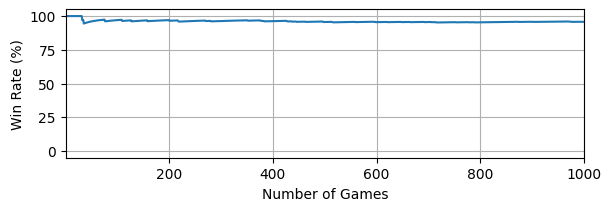

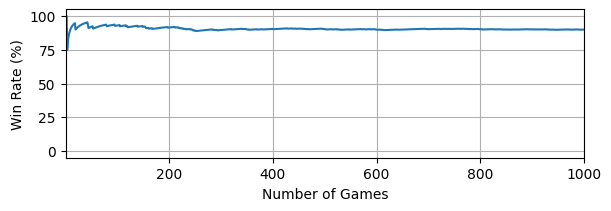

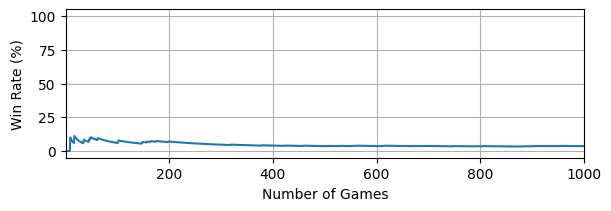

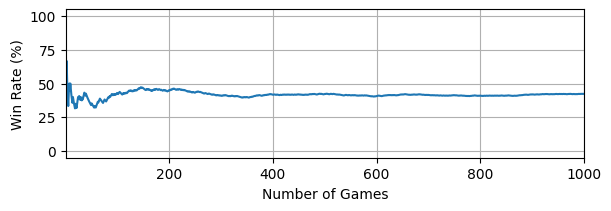

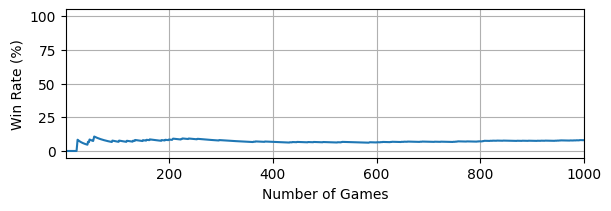

In [15]:
# Initialize win percentage matrix
win_rate_matrix = np.zeros((len(agents), len(versus_configs)))
# run all Configurations
for ag in agents:
    for j, vs in enumerate(versus_configs):
        win_rate = np.zeros(N_GAMES)
        for i in range(N_GAMES):
            players = (ag,) + (vs,)
            winner = LiarsDiceGame.game(*players, save_json=False)
            if i == 0:
                win_rate[i] = 1 if winner == 0 else 0
            else:
                if winner == 0:
                    win_rate[i] = (win_rate[i - 1] * i + 1) / (i + 1)
                else:
                    win_rate[i] = (win_rate[i - 1] * i) / (i + 1)
        # plot and save results
        plt.subplots(figsize=latex_figsize, constrained_layout=True)
        plt.plot(range(1, N_GAMES + 1), win_rate * 100)
        plt.xlabel("Number of Games", fontsize=latex_fontsize)
        plt.ylabel("Win Rate (%)", fontsize=latex_fontsize)
        plt.xlim(1, N_GAMES)
        plt.ylim(-5, 105)
        plt.grid()
        plt.savefig(f"{save_path}{ag}_vs_{'_'.join(vs)}.pdf")
        plt.show()
        win_rate_matrix[agents.index(ag), j] = win_rate[-1]

In [17]:
# display win rate matrix as dataframe
label_map = {
    "random": "R",
    "conservative": "C",
    "risky": "A",
    "wildcard_conservative": "WC-C",
    "wildcard_risky": "WC-A"
}

win_df = pd.DataFrame(
        win_rate_matrix*100, 
        index=[label_map[ag] for ag in agents], 
        #columns=[f"vs ({', '.join([label_map[v] for v in vs])})" for vs in versus_configs])
        columns=[f"vs ({vs})" for vs in versus_configs])
display(win_df)

,vs (random),vs (wildcard_risky),vs (wildcard_conservative),vs (risky),vs (conservative)
WC-C,99.9,99.7,48.5,92.1,29.0
WC-A,79.7,53.0,0.0,4.3,0.8
C,100.0,98.5,71.9,88.3,52.1
A,95.7,90.0,3.6,42.4,8.0


In [8]:
# assemble latex table
print("\\begin{table}[h!]\n\\centering\n\\scriptsize")
print(
"\\caption{Win rates for different agent configurations in LiarsDice game. \\\(R: Random, C: Conservative, A: Risky, WC-C: Wildcard Conservative, WC-A: Wildcard Risky).}\n"
)
print(win_df.to_latex(float_format=lambda x: f"$\\num{{{x:1.1f}}}$\%"))
print("\\end{table}")

\begin{table}[h!]
\centering
\scriptsize
\caption{Win rates for different agent configurations in LiarsDice game. \\(R: Random, C: Conservative, A: Risky, WC-C: Wildcard Conservative, WC-A: Wildcard Risky).}

\begin{tabular}{lrrrrrrrrr}
\toprule
 & vs (R, WC-A) & vs (WC-A, WC-C) & vs (WC-C, R) & vs (R, R) & vs (WC-A, WC-A) & vs (WC-C, WC-C) & vs (C, C) & vs (A, A) & vs (A, C) \\
\midrule
WC-C & $\num{99.7}$\% & $\num{36.2}$\% & $\num{43.5}$\% & $\num{100.0}$\% & $\num{99.8}$\% & $\num{33.8}$\% & $\num{0.4}$\% & $\num{50.8}$\% & $\num{13.2}$\% \\
WC-A & $\num{48.0}$\% & $\num{0.3}$\% & $\num{0.1}$\% & $\num{74.8}$\% & $\num{36.2}$\% & $\num{0.0}$\% & $\num{0.0}$\% & $\num{2.9}$\% & $\num{0.3}$\% \\
C & $\num{99.2}$\% & $\num{70.0}$\% & $\num{78.6}$\% & $\num{99.8}$\% & $\num{99.1}$\% & $\num{62.1}$\% & $\num{33.3}$\% & $\num{82.4}$\% & $\num{16.1}$\% \\
A & $\num{88.9}$\% & $\num{6.0}$\% & $\num{2.2}$\% & $\num{88.4}$\% & $\num{88.1}$\% & $\num{2.6}$\% & $\num{2.6}$\% & $\num{30.2}$\% &